## Titanic 

### Data Cleaning 

In [1]:
import numpy as np
import pandas as pd

from sklearn import linear_model 
from sklearn import svm
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt

import math
import warnings
%matplotlib inline 

import os
import subprocess

In [8]:
names = [
                    "PassengerId", 
                     "Survived",
                     "Pclass",
                     "Name",
                     "Sex",
                     "Age",
                     "SibSp",
                     "Parch",
                     "Ticket",
                     "Fare",
                     "Cabin",
                     "Embarked"
        ]

In [9]:
#ground_truth of data
train = pd.read_csv("train.csv",na_values="?")
test = pd.read_csv("test.csv",na_values="?")

In [10]:
#copies of data
train_copy = train.copy(deep=True)
test_copy = test.copy(deep = True)

In [11]:
data_arr = [train_copy,test_copy]

In [12]:
train_copy.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [13]:
test_copy.head(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [14]:
num_samples=train_copy.shape[0]
num_attributes = train_copy.shape[1]

In [15]:
print ("The titanic dataset contains {} observations".format(num_samples))
print ("The titanic dataset contains {} attributes".format(num_attributes))

The titanic dataset contains 891 observations
The titanic dataset contains 12 attributes


There seem to be columns within the trainning and test data that consists of NaN values

In [16]:
print("Training data")
print (train_copy.isnull().sum())
print("-"*10)
print("Testing data")
print(test_copy.isnull().sum())

Training data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Testing data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Let's clean those values up! 

A good method to fill in NaN values is to use the median or the mode

In [17]:
# clean the data ~> get ride of NaN values
for data in data_arr:
    
    data['Age'].fillna(data['Age'].median(),inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
    data['Fare'].fillna(data['Fare'].median(),inplace=True)


The problem statement suggests that we should drop 'PassengerId', "Cabin' ,'Ticket'

In [18]:
#per the rules; we are supposed to drop cabin number from training set
drop_columns = ["PassengerId","Cabin","Ticket"]
train_copy.drop(drop_columns,axis = 1,inplace=True)
test_copy.drop(drop_columns,axis=1,inplace=True)

Let's double check that our data cleaning worked!

In [19]:
#double check the cleaning went as planned
print("Training data")
print (train_copy.isnull().sum())
print("-"*10)
print("Testing data")
print(test_copy.isnull().sum())

Training data
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
Testing data
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


These shapes check out, since the training dataframe still has the 'Survived' Column

In [20]:
#train_copy still has the 'survived' column
print(train_copy.shape)
print(test_copy.shape)

(891, 9)
(418, 8)


We still have to deal with the 'Object" type columns...

They will throw errors for the majority of algorithms that we want to apply to the dataset!

In [21]:
#We will have to perform feature mapping on the 'object' type columns
print("Training data information")
train_copy.info()
print("-"*10)
print("Testing data information")
test_copy.info()

Training data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB
----------
Testing data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


Let's explore some feature engineering! 

We hypothesize that the title along with family size greatly affect an individual's chances of survival!

In [22]:
#feature engineering
for d in data_arr:
    
    #family size
    d['FamilySize'] = d['SibSp'] + d['Parch'] + 1
    d['IsAlone'] = 1
    
    d['IsAlone'].loc[d['FamilySize'] > 1] = 0
    
    #title
    d["Title"] = d['Name'].str.split(",",expand=True)[1].str.split('.',expand=True)[0]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Can never be to careful when it comes to double checking your work!

We also notice that there are alot of 'misc' titles..... Which should we worry about?

In [23]:
#double check the cleaning went as planned
print("Training data information")
print(train_copy["Title"].value_counts())

Training data information
 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Capt              1
 the Countess      1
 Lady              1
 Jonkheer          1
 Ms                1
 Don               1
 Mme               1
 Sir               1
Name: Title, dtype: int64


Let's only consider the titles that occur greateer than 10 times!

In [24]:
#eliminate misc titles
min_occurences = 10
#creates a series indexed by title
title_names  = (train_copy['Title'].value_counts() > min_occurences)
print(title_names)

 Mr               True
 Miss             True
 Mrs              True
 Master           True
 Dr              False
 Rev             False
 Major           False
 Col             False
 Mlle            False
 Capt            False
 the Countess    False
 Lady            False
 Jonkheer        False
 Ms              False
 Don             False
 Mme             False
 Sir             False
Name: Title, dtype: bool


In [25]:
train_copy['Title'] = train_copy["Title"].apply(lambda x: x if title_names.loc[x] == True else 'Misc')

In [26]:
print("Here are the relevant titles...")
print(train_copy["Title"].value_counts())

Here are the relevant titles...
 Mr        517
 Miss      182
 Mrs       125
 Master     40
Misc        27
Name: Title, dtype: int64


We expect that the same number of title's to have been created as the rest of the columns

In [27]:

print("This is the trainning data...")
train_copy.info()
print("-"*10)
print("This is the testing data...")
test_copy.info()

This is the trainning data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB
----------
This is the testing data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Pclass        418 non-null int64
Name          418 non-null object
Sex           418 non-null object
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Embarked      418

Since we have the 'Titles' let's drop the 'Names'

In [28]:
train_copy.drop(['Name'],axis=1,inplace=True)
test_copy.drop(['Name'],axis=1,inplace=True)

In [29]:
print(train_copy.shape)
print(test_copy.shape)

(891, 11)
(418, 10)


Finally, we can take care of label encoding

In [30]:
#convert formats
#age
#title
#embarked
label = LabelEncoder()
one_hot = OneHotEncoder()

In [31]:
for d in data_arr:
    d['Embarked'] = label.fit_transform(d['Embarked'])
    d['Title'] = label.fit_transform(d["Title"])
    d['Sex'] = label.fit_transform(d['Sex'])

In [32]:
print("After some feature mapping...")
print("This is the trainning data...")
train_copy.info()
print("-"*10)
print("This is the testing data...")
test_copy.info()

After some feature mapping...
This is the trainning data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null int64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null int64
dtypes: float64(2), int64(9)
memory usage: 76.6 KB
----------
This is the testing data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Embarked      418 non-null int64
FamilySize    418 non-null int64
IsAlo

After all our hardwork the data is clean as a whistle!!

In [33]:
train_copy.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64

In [34]:
test_copy.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64

In [35]:
print ("Training data shape: {}".format(train_copy.shape))
print ("Testing date shape: {}".format(test_copy.shape))

Training data shape: (891, 11)
Testing date shape: (418, 10)


And yet, let us not forget about the trainning targets

In [36]:
Y_train  = train_copy['Survived']
#train_copy.drop(['Survived'],axis=1,inplace=True)

In [38]:
print ("After dropping the 'Survived' column ...")
print(train_copy.shape)
print(test_copy.shape)

After dropping the 'Survived' column ...
(891, 11)
(418, 10)


In [39]:
X_train = train_copy.copy(deep = True)
X_train.drop(["Survived"],axis=1,inplace=True)

### Data Exploration

OMG so many stats

SO many stories!!

Text(0,0.5,'Fare ($)')

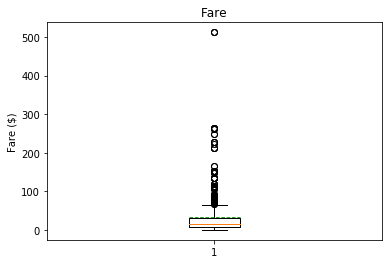

In [33]:
plt.boxplot(x=train_copy['Fare'],showmeans=True,meanline=True)
plt.title('Fare')
plt.ylabel("Fare ($)")

There seem to be a disproportional amount of high-paying passengers that skew the data

Text(0,0.5,'Age (years)')

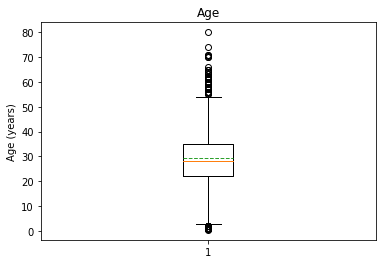

In [34]:
plt.boxplot(x=train_copy['Age'],showmeans=True,meanline=True)
plt.title('Age')
plt.ylabel('Age (years)')

The p50 age is more representative of the average age than the mean

Text(0,0.5,'FamilySize (#)')

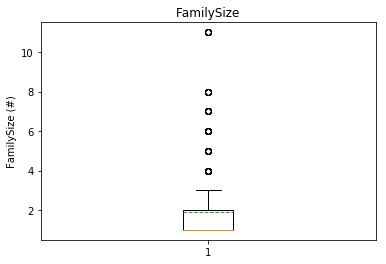

In [35]:
plt.boxplot(x=train_copy['FamilySize'],showmeans=True,meanline=True)
plt.title("FamilySize")
plt.ylabel("FamilySize (#)")

Similar to 'Age' and 'Fair' the 'FamilySize' seems to be artifically inflated due to large families

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


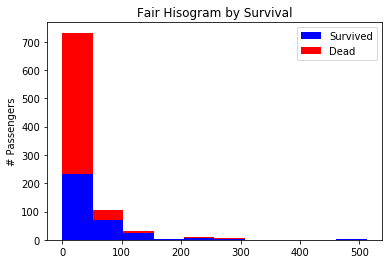

In [36]:
plt.hist(x=[train_copy[train_copy['Survived'] == 1]['Fare'], train_copy[train_copy['Survived'] == 0]['Fare']],
         stacked=True,
        color=['b','r'],
        label=['Survived','Dead'])

plt.title('Fair Hisogram by Survival')
plt.ylabel('# Passengers')



plt.legend()

Interestingly enough the the majority of those who survived paid the lowest for their time aboard the titanic. 

As expected the highest proportion of those 'Dead'  also rerpesented the lowest fair paid.

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


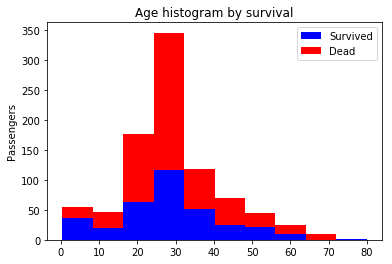

In [37]:
plt.hist(x=[train_copy[train_copy['Survived'] == 1]['Age'], train_copy[train_copy['Survived'] == 0]['Age']],
        stacked=True,
        color=['b','r'],
        label=['Survived','Dead'])


plt.title("Age histogram by survival")
plt.ylabel("Passengers")

plt.legend()

"Age" seems to follow a normal curve in terms of those who 'survived' and 'died'. Could be attributed to the fact that 'Age' itself was normally distributed

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


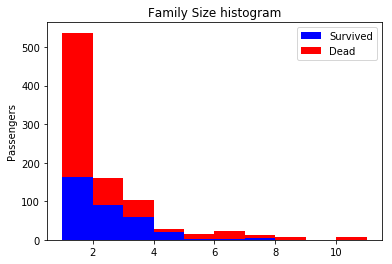

In [38]:
plt.hist(
                x=[train_copy[train_copy['Survived'] == 1]["FamilySize"],train_copy[train_copy['Survived'] == 0]['FamilySize']],
                stacked = True,
                color = ["b",'r'],
                label = ['Survived','Dead']
)

plt.title("Family Size histogram")
plt.ylabel("Passengers")

plt.legend()

Smaller families had a higher chance of surviving. Yet, this insight could also be fueled by the fact that the majority of families were small.

Larger families had the lowest chance of survival!

In [39]:
import seaborn as sns

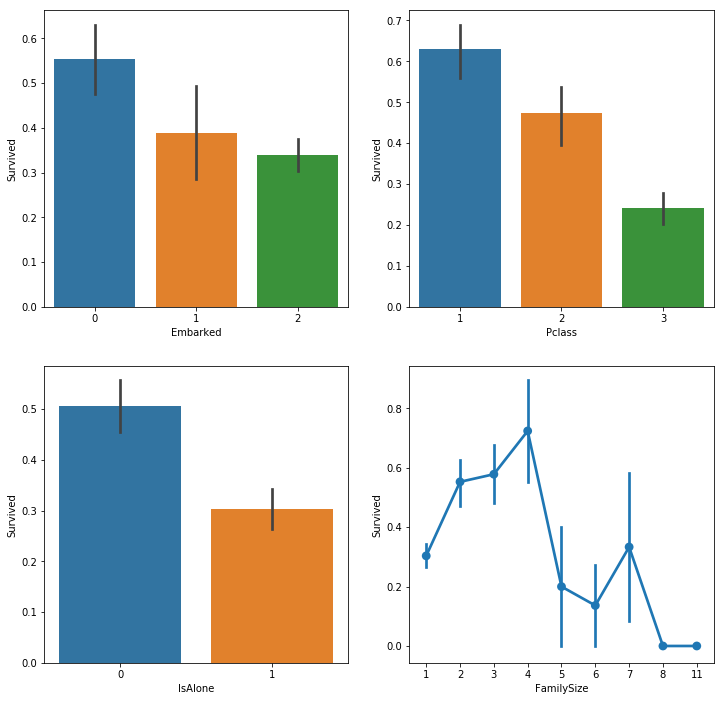

In [40]:
#init a (2,2) subplot where each subplot is (12,12)
fig, saxis = plt.subplots(2, 2,figsize=(12,12))

sns.barplot(x="Embarked",y="Survived",data=train_copy,ax = saxis[0,0])
sns.barplot(x="Pclass",y='Survived',data=train_copy,ax=saxis[0,1])
sns.barplot(x="IsAlone",y="Survived",data=train_copy,ax=saxis[1,0])
sns.pointplot(x="FamilySize",y="Survived",data=train_copy,ax=saxis[1,1])

(0,0 ) ~> It seems that "location 0" had the highest proportion of survivors.

(0,1) ~> As expected "first class passengers" have the highest proportion of survivors.

(1,0) ~> Families had a higher chance of surviving

(1,1) ~> Family with four or less members had the highest chances of survival


Let's dig a bit deeper into the statistics surrounding Location 0

Text(0,0.5,'Age  (years)')

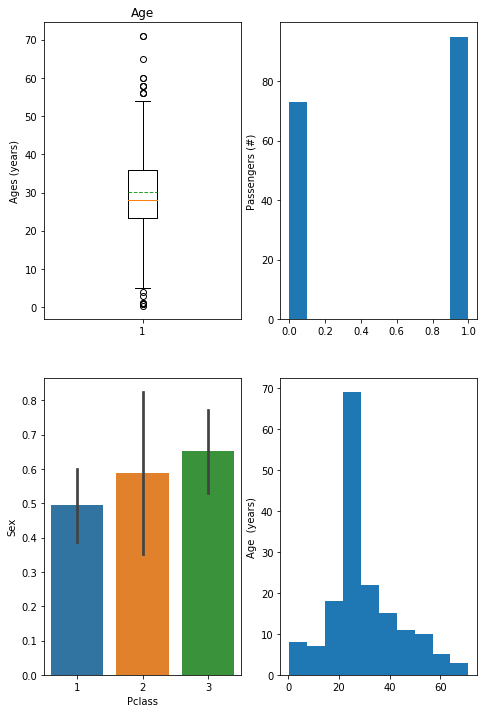

In [41]:
plt.figure(figsize=[12,12])

plt.subplot(231)
plt.boxplot(
                        x=[train_copy[train_copy['Embarked']==0]['Age']],
                        showmeans=True,
                        meanline=True,
           )
plt.title("Age")
plt.ylabel("Ages (years)")

plt.subplot(232)
plt.hist(
    x=[train_copy[train_copy["Embarked"] == 0 ]["Sex"] ],
)
plt.ylabel("Passengers (#)")

plt.subplot(234)
sns.barplot(x="Pclass",y="Sex",data=train_copy[train_copy["Embarked"] == 0])

plt.subplot(235)
#sns.barplot(x="Pclass",y="Survived",data=train_copy[train_copy["Embarked"] == 0])
plt.hist(
        x = [train_copy[train_copy['Embarked'] == 0]['Age']]
)
plt.ylabel("Age  (years)")

The majority of passengers embarking from location 0 were male, yet the majority of passengers embarking from location 0 in first class were female.

Unsurprisingly the highest proportion of passengers from first class survived.

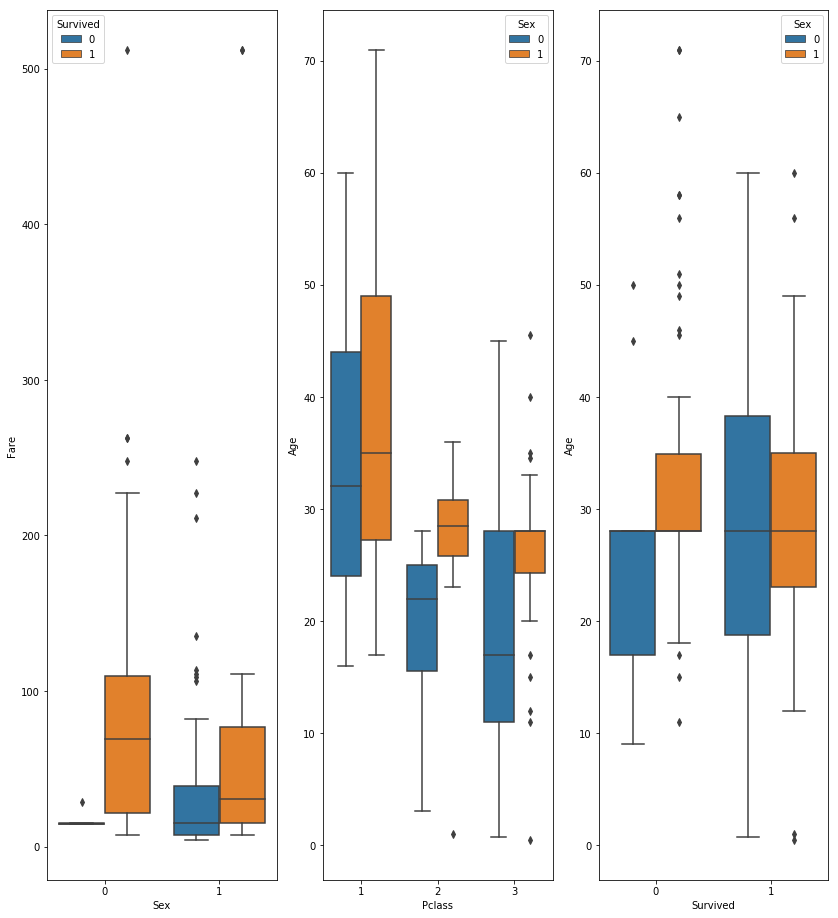

In [42]:
fig, axs = plt.subplots(1,3,figsize=(14,16))

sns.boxplot(x="Sex",y="Fare",hue="Survived",data=train_copy[train_copy["Embarked"] == 0],ax = axs[0])
sns.boxplot(x="Pclass",y="Age",hue='Sex',data=train_copy[train_copy["Embarked"] == 0],ax = axs[1])
sns.boxplot(x="Survived",y="Age",hue="Sex",data=train_copy[train_copy["Embarked"] == 0],ax=axs[2])

Those that survived paid significantly more than those that did not. Unsurprisingly, women paid significantly more to survive than men.

The difference in age of first class passengers seems to the be smallest, as opposed to a larger difference in age of passengers in second and third class.

It seems that older passengers were given priority over the younger passengers.


### Data Modelling

Let's find the labels that explain the most variation in the data set

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [45]:
std_transform = StandardScaler()

In [46]:
X_train_std = std_transform.fit_transform(X_train)

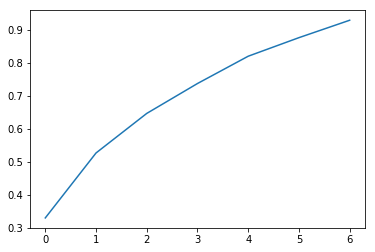

In [47]:
pca = PCA(n_components=7)
principal_components = pca.fit_transform(X_train_std)
projected = pca.inverse_transform(principal_components)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

90% of the variance is explained within 7 principal components

In [48]:
principal_components.shape

(891, 7)

In [49]:
#convert to numpy.ndarrays
X_train = X_train.values
Y_train = Y_train.values

In [50]:
acc_train_logreg = []

In [51]:
acc_test_logreg = []

In [52]:
c_logreg = [0.1,1,10,100,1000]

In [53]:
params = {
    "L1":[0.1,1,10,100],
    "L2":[0.1,1,10,100]
         }

In [54]:
# apply feature transformations!
from sklearn.preprocessing import PolynomialFeatures, normalize

In [55]:
poly = PolynomialFeatures(2)
X_train_norm = normalize(X_train)

In [56]:
X_train_transformed = poly.fit_transform(X_train)
labels = X_train_transformed.shape[1]
observations = X_train_transformed.shape[0]

In [57]:
print ("The transformed titanic dataset has {} observations.".format(observations))
print("The titanic dataset has {} labels".format(labels))

The transformed titanic dataset has 891 observations.
The titanic dataset has 66 labels


In [58]:
#split the trainning set into test and training set
split = math.floor(num_samples*0.5)

X_train_split = X_train[0 : split, :]
X_test_split = X_train[split: , :  ]
Y_train_split = Y_train[0:split]
Y_test_split = Y_train[split: ]

Let's split our data sets into trainning and test...

In [59]:
#transformed data
X_train_split_transformed = poly.fit_transform(X_train_split)
X_test_split_transformed = poly.fit_transform(X_test_split)

#normalized data
X_train_norm_split = X_train_norm[0:split,:]
X_test_norm_split = X_train_norm[split:,:]


#standardized data
X_train_std_split = X_train_std[0 : split, :]
X_test_std_split = X_train_std[split:,:]


#principal components
principal_components_split = principal_components[0:split,:]
principal_components_split_test = principal_components[split:,:]


#transformed principal components
principal_components_split_transformed = poly.fit_transform(principal_components_split)
principal_components_split_test_transformed = poly.fit_transform(principal_components_split_test)

In [60]:
print("Transformed training observations has shape: {}".format(X_train_split_transformed.shape))
print("Training targets has shape: {}".format(Y_train_split.shape))
print("Transformed testing observations has shape: {}".format(X_test_split_transformed.shape))

Transformed training observations has shape: (445, 66)
Training targets has shape: (445,)
Transformed testing observations has shape: (446, 66)


In [61]:
print("Training observations has shape: {}".format(X_train_split.shape))
print("Training targets has shape: {}".format(Y_train_split.shape))
print("Testing observations has shape: {}".format(X_test_split.shape))

Training observations has shape: (445, 10)
Training targets has shape: (445,)
Testing observations has shape: (446, 10)


In [62]:
print("Training observations(Principal Components) has shape: {}".format(principal_components_split.shape))
print("Training targets has shape: {}".format(Y_train_split.shape))
print("Testing observations(Principal Componets) has shape: {}".format(principal_components_split_test.shape))

Training observations(Principal Components) has shape: (445, 7)
Training targets has shape: (445,)
Testing observations(Principal Componets) has shape: (446, 7)


In [63]:
print("Standardized training observations(Principal Components) has shape: {}".format(X_train_std_split.shape))
print("Training targets has shape: {}".format(Y_train_split.shape))
print("Standardized testing observations(Principal Componets) has shape: {}".format(X_test_std_split.shape))

Standardized training observations(Principal Components) has shape: (445, 10)
Training targets has shape: (445,)
Standardized testing observations(Principal Componets) has shape: (446, 10)


In [64]:
print("Normalized training observations(Principal Components) has shape: {}".format(X_train_norm_split.shape))
print("Training targets has shape: {}".format(Y_train_split.shape))
print("Normalized testing observations(Principal Componets) has shape: {}".format(X_test_norm_split.shape))

Normalized training observations(Principal Components) has shape: (445, 10)
Training targets has shape: (445,)
Normalized testing observations(Principal Componets) has shape: (446, 10)


In [65]:
print("Transformed training observations(Principal Components) has shape: {}".format(principal_components_split_transformed.shape))
print("Training targets has shape: {}".format(Y_train_split.shape))
print("Transformed testing observations(Principal Components) has shape: {}".format(principal_components_split_test_transformed.shape))

Transformed training observations(Principal Components) has shape: (445, 36)
Training targets has shape: (445,)
Transformed testing observations(Principal Components) has shape: (446, 36)


In [118]:
def test_logistic_model_with(X_train,Y_train,X_test,Y_test,params):
    '''
            Author: Kyle Ong
            Date 05/13/2018
            
            trains and tests linear_model.LogisticRegression()
            
            X_train:type: numpy.ndarray
            Y_train: type: numpy.ndarray
            X_test: type: numpy.ndarray
            Y_test: type: numpy.ndarray
            params: type: dict {penalty : [c_val]}
    '''
    for k,v in params.items():
        
        penalty = k
        acc_train_array = []
        acc_test_arr = []

        for c_val in v:
            #this is baest coding skills
            log_model = 1
            if penalty.lower() == "l1" :
                log_model = linear_model.LogisticRegression(penalty=penalty, C=c_val,solver='saga')
            
            elif penalty.lower() == 'l2':
                log_model = linear_model.LogisticRegression( C=c_val)
               
            #uncoment context manager in order to get the convergence warning!
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore', category=ConvergenceWarning)
                try:
                     #fit the model
                    log_model.fit(X_train,Y_train)  
                
                    #train the model
                    Y_hat = log_model.predict(X_train)
                    train_acc = np.mean(Y_hat == Y_train)
                    acc_train_array.append(train_acc)
                    print("Training() ~> Accuracy with {} loss and c_val {} : {}".format(penalty,c_val,train_acc))
                
                    #test the model
                    Y_hat_test = log_model.predict(X_test)
                    acc_test =np.mean(Y_test == Y_hat_test)
                    acc_test_arr.append(acc_test)
                    print("Testing ~> Accuracy with {} loss and c_val {}: {}".format(penalty,c_val,acc_test))
                    
                    print("\n")
                    
                
                except Warning as w:
                    print(w)
                    
        plt.plot(v,acc_test_arr)
        #plt.xlabel('C values')
        plt.ylabel('Test accuracy')
                


Training() ~> Accuracy with L1 loss and c_val 0.1 : 0.6696629213483146
Testing ~> Accuracy with L1 loss and c_val 0.1: 0.6860986547085202


Training() ~> Accuracy with L1 loss and c_val 1 : 0.6696629213483146
Testing ~> Accuracy with L1 loss and c_val 1: 0.6860986547085202


Training() ~> Accuracy with L1 loss and c_val 10 : 0.6696629213483146
Testing ~> Accuracy with L1 loss and c_val 10: 0.6860986547085202


Training() ~> Accuracy with L1 loss and c_val 100 : 0.6696629213483146
Testing ~> Accuracy with L1 loss and c_val 100: 0.6860986547085202


Training() ~> Accuracy with L2 loss and c_val 0.1 : 0.802247191011236
Testing ~> Accuracy with L2 loss and c_val 0.1: 0.7825112107623319


Training() ~> Accuracy with L2 loss and c_val 1 : 0.8067415730337079
Testing ~> Accuracy with L2 loss and c_val 1: 0.7869955156950673


Training() ~> Accuracy with L2 loss and c_val 10 : 0.8112359550561797
Testing ~> Accuracy with L2 loss and c_val 10: 0.7959641255605381


Training() ~> Accuracy with L2 lo

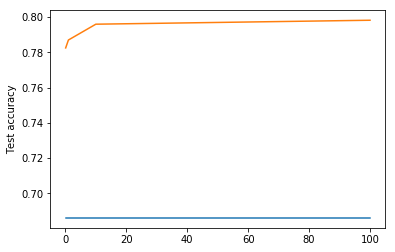

In [119]:
test_logistic_model_with(X_train_split,Y_train_split,X_test_split,Y_test_split,params)

Training() ~> Accuracy with L1 loss and c_val 0.1 : 0.802247191011236
Testing ~> Accuracy with L1 loss and c_val 0.1: 0.7914798206278026


Training() ~> Accuracy with L1 loss and c_val 1 : 0.802247191011236
Testing ~> Accuracy with L1 loss and c_val 1: 0.7937219730941704


Training() ~> Accuracy with L1 loss and c_val 10 : 0.802247191011236
Testing ~> Accuracy with L1 loss and c_val 10: 0.7959641255605381


Training() ~> Accuracy with L1 loss and c_val 100 : 0.802247191011236
Testing ~> Accuracy with L1 loss and c_val 100: 0.7959641255605381


Training() ~> Accuracy with L2 loss and c_val 0.1 : 0.8
Testing ~> Accuracy with L2 loss and c_val 0.1: 0.7959641255605381


Training() ~> Accuracy with L2 loss and c_val 1 : 0.802247191011236
Testing ~> Accuracy with L2 loss and c_val 1: 0.7959641255605381


Training() ~> Accuracy with L2 loss and c_val 10 : 0.802247191011236
Testing ~> Accuracy with L2 loss and c_val 10: 0.7959641255605381


Training() ~> Accuracy with L2 loss and c_val 100 : 0

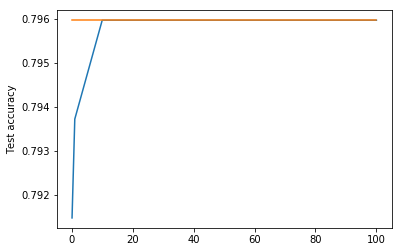

In [120]:
test_logistic_model_with(principal_components_split,Y_train_split,principal_components_split_test,Y_test_split,params)

Training() ~> Accuracy with L1 loss and c_val 0.1 : 0.6404494382022472
Testing ~> Accuracy with L1 loss and c_val 0.1: 0.6816143497757847


Training() ~> Accuracy with L1 loss and c_val 1 : 0.6404494382022472
Testing ~> Accuracy with L1 loss and c_val 1: 0.6816143497757847


Training() ~> Accuracy with L1 loss and c_val 10 : 0.6404494382022472
Testing ~> Accuracy with L1 loss and c_val 10: 0.6816143497757847


Training() ~> Accuracy with L1 loss and c_val 100 : 0.6404494382022472
Testing ~> Accuracy with L1 loss and c_val 100: 0.6816143497757847


Training() ~> Accuracy with L2 loss and c_val 0.1 : 0.8404494382022472
Testing ~> Accuracy with L2 loss and c_val 0.1: 0.8116591928251121


Training() ~> Accuracy with L2 loss and c_val 1 : 0.8539325842696629
Testing ~> Accuracy with L2 loss and c_val 1: 0.8116591928251121


Training() ~> Accuracy with L2 loss and c_val 10 : 0.8539325842696629
Testing ~> Accuracy with L2 loss and c_val 10: 0.8004484304932735


Training() ~> Accuracy with L2 l

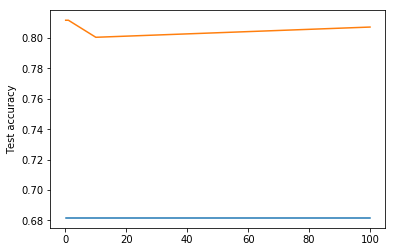

In [122]:
test_logistic_model_with(X_train_split_transformed,Y_train_split,X_test_split_transformed,Y_test_split,params)

Training() ~> Accuracy with L2 loss and c_val 100 : 0.8449438202247191
Testing ~> Accuracy with L2 loss and c_val 100: 0.8116591928251121

Training() ~> Accuracy with L1 loss and c_val 0.1 : 0.8337078651685393
Testing ~> Accuracy with L1 loss and c_val 0.1: 0.8228699551569507


Training() ~> Accuracy with L1 loss and c_val 1 : 0.8337078651685393
Testing ~> Accuracy with L1 loss and c_val 1: 0.8228699551569507


Training() ~> Accuracy with L1 loss and c_val 10 : 0.8337078651685393
Testing ~> Accuracy with L1 loss and c_val 10: 0.8228699551569507


Training() ~> Accuracy with L1 loss and c_val 100 : 0.8337078651685393
Testing ~> Accuracy with L1 loss and c_val 100: 0.8228699551569507


Training() ~> Accuracy with L2 loss and c_val 0.1 : 0.8337078651685393
Testing ~> Accuracy with L2 loss and c_val 0.1: 0.8251121076233184


Training() ~> Accuracy with L2 loss and c_val 1 : 0.8471910112359551
Testing ~> Accuracy with L2 loss and c_val 1: 0.8116591928251121


Training() ~> Accuracy with L2 loss and c_val 10 : 0.8449438202247191
Testing ~> Accuracy with L2 loss and c_val 10: 0.8116591928251121


Training() ~> Accuracy with L2 l

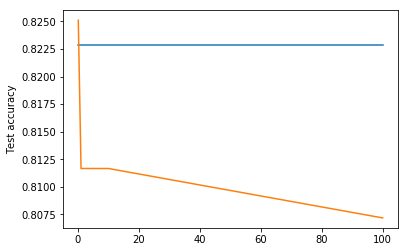

In [123]:
test_logistic_model_with(principal_components_split_transformed,Y_train_split,principal_components_split_test_transformed,Y_test_split,params)

Training() ~> Accuracy with L1 loss and c_val 100 : 0.8337078651685393
Testing ~> Accuracy with L1 loss and c_val 100: 0.8228699551569507

Training() ~> Accuracy with L1 loss and c_val 0.1 : 0.6561797752808989
Testing ~> Accuracy with L1 loss and c_val 0.1: 0.6905829596412556


Training() ~> Accuracy with L1 loss and c_val 1 : 0.6494382022471911
Testing ~> Accuracy with L1 loss and c_val 1: 0.7152466367713004


Training() ~> Accuracy with L1 loss and c_val 10 : 0.6831460674157304
Testing ~> Accuracy with L1 loss and c_val 10: 0.7466367713004485


Training() ~> Accuracy with L1 loss and c_val 100 : 0.7528089887640449
Testing ~> Accuracy with L1 loss and c_val 100: 0.7645739910313901


Training() ~> Accuracy with L2 loss and c_val 0.1 : 0.6584269662921348
Testing ~> Accuracy with L2 loss and c_val 0.1: 0.6838565022421524


Training() ~> Accuracy with L2 loss and c_val 1 : 0.6494382022471911
Testing ~> Accuracy with L2 loss and c_val 1: 0.7107623318385651


Training() ~> Accuracy with L2 loss and c_val 10 : 0.6876404494382022
Testing ~> Accuracy with L2 loss and c_val 10: 0.7466367713004485


Training() ~> Accuracy with L2 l

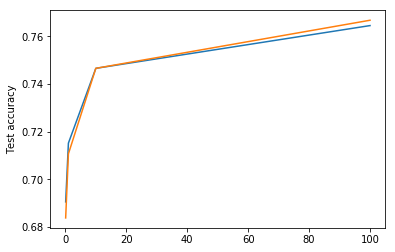

In [81]:
test_logistic_model_with(X_train_norm_split,Y_train_split,X_test_norm_split,Y_test_split,params)

Training() ~> Accuracy with L2 loss and c_val 100 : 0.755056179775281
Testing ~> Accuracy with L2 loss and c_val 100: 0.7668161434977578

Training() ~> Accuracy with L1 loss and c_val 0.1 : 0.8067415730337079
Testing ~> Accuracy with L1 loss and c_val 0.1: 0.8026905829596412


Training() ~> Accuracy with L1 loss and c_val 1 : 0.8112359550561797
Testing ~> Accuracy with L1 loss and c_val 1: 0.7982062780269058


Training() ~> Accuracy with L1 loss and c_val 10 : 0.8089887640449438
Testing ~> Accuracy with L1 loss and c_val 10: 0.7982062780269058


Training() ~> Accuracy with L1 loss and c_val 100 : 0.8089887640449438
Testing ~> Accuracy with L1 loss and c_val 100: 0.7982062780269058


Training() ~> Accuracy with L2 loss and c_val 0.1 : 0.8089887640449438
Testing ~> Accuracy with L2 loss and c_val 0.1: 0.8004484304932735


Training() ~> Accuracy with L2 loss and c_val 1 : 0.8112359550561797
Testing ~> Accuracy with L2 loss and c_val 1: 0.7959641255605381


Training() ~> Accuracy with L2 loss and c_val 10 : 0.8089887640449438
Testing ~> Accuracy with L2 loss and c_val 10: 0.7982062780269058


Training() ~> Accuracy with L2 l

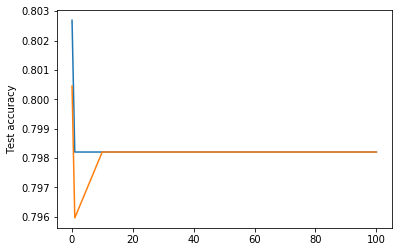

In [83]:
test_logistic_model_with(X_train_std_split,Y_train_split,X_test_std_split,Y_test_split,params)

Training() ~> Accuracy with L1 loss and c_val 0.1 : 0.8067415730337079
Testing ~> Accuracy with L1 loss and c_val 0.1: 0.8026905829596412

In [64]:
# let's try support vector machines!
from sklearn import svm

In [65]:
def svm_linear(c,X_train,Y_train,X_test,Y_test):
    '''
            Author: Kyle Ong
            Date: 05/13/2018
            
            fits a svm.SVC(probability = False, kernel = 'linear', C = c) to X_train and Y_train
            calculates the training and test accuracies 
            
            c: type: int
            X_train: numpy.ndarray
            Y_train: numpy.ndarray
            X_test: numpy.ndarray
            Y_test: numpy.ndarray
            
            will ignore convergence warnings thrown by sklearn
    
    '''
    
    linear = svm.SVC(probability=False, kernel='linear',C=c)
    
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=ConvergenceWarning)
        
        try:

            linear.fit(X_train,Y_train)
            
            Y_hat_train = linear.predict(X_train)
            train_acc =np.mean(Y_hat_train == Y_train)
            print("Training ~> This is the training accuracy with Linear kernel and c_val {}: {}".format(c,train_acc))
            
            
            Y_hat_test = linear.predict(X_test)
            test_acc = np.mean(Y_hat_test == Y_test)
            linear_test_acc.append(test_acc)
            print("Testing ~> This is the testing accuracy with Linear kernel and c_val {}:  {}".format(c,test_acc))
            
            print("\n")
        
        except Warning as w:
            print(w)
            
            

In [66]:
c_vals = [0.1,1,10,100]

Trainning and testing on the un-altered data

In [67]:
linear_test_acc = []
for c in c_vals:
    svm_linear(c,X_train_split,Y_train_split,X_test_split,Y_test_split)

Training ~> This is the training accuracy with Linear kernel and c_val 0.1: 0.8
Testing ~> This is the testing accuracy with Linear kernel and c_val 0.1:  0.773542600896861


Training ~> This is the training accuracy with Linear kernel and c_val 1: 0.8
Testing ~> This is the testing accuracy with Linear kernel and c_val 1:  0.773542600896861


Training ~> This is the training accuracy with Linear kernel and c_val 10: 0.8
Testing ~> This is the testing accuracy with Linear kernel and c_val 10:  0.773542600896861


Training ~> This is the training accuracy with Linear kernel and c_val 100: 0.802247191011236
Testing ~> This is the testing accuracy with Linear kernel and c_val 100:  0.7825112107623319




Text(0,0.5,'linear kernel test accuracies')

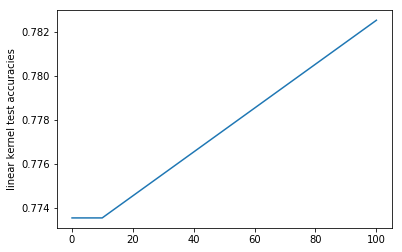

In [68]:
plt.plot(c_vals,linear_test_acc)
#plt.xlabel("C values")
plt.ylabel("linear kernel test accuracies")

Let's try that with our principal components

In [69]:
linear_test_acc = []
for c in c_vals:
    svm_linear(c,principal_components_split,Y_train_split,principal_components_split_test,Y_test_split)

Training ~> This is the training accuracy with Linear kernel and c_val 0.1: 0.802247191011236
Testing ~> This is the testing accuracy with Linear kernel and c_val 0.1:  0.7780269058295964


Training ~> This is the training accuracy with Linear kernel and c_val 1: 0.802247191011236
Testing ~> This is the testing accuracy with Linear kernel and c_val 1:  0.7780269058295964


Training ~> This is the training accuracy with Linear kernel and c_val 10: 0.802247191011236
Testing ~> This is the testing accuracy with Linear kernel and c_val 10:  0.7780269058295964


Training ~> This is the training accuracy with Linear kernel and c_val 100: 0.802247191011236
Testing ~> This is the testing accuracy with Linear kernel and c_val 100:  0.7780269058295964




Text(0,0.5,'linear kernel test accuracies')

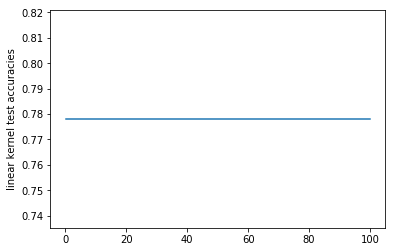

In [70]:
plt.plot(c_vals,linear_test_acc)
#plt.xlabel("C values")
plt.ylabel("linear kernel test accuracies")

In [71]:
linear_test_acc = []
for c in c_vals:
    svm_linear(c,X_train_std_split,Y_train_split,X_test_std_split,Y_test_split)

Training ~> This is the training accuracy with Linear kernel and c_val 0.1: 0.8
Testing ~> This is the testing accuracy with Linear kernel and c_val 0.1:  0.773542600896861


Training ~> This is the training accuracy with Linear kernel and c_val 1: 0.8
Testing ~> This is the testing accuracy with Linear kernel and c_val 1:  0.773542600896861


Training ~> This is the training accuracy with Linear kernel and c_val 10: 0.8
Testing ~> This is the testing accuracy with Linear kernel and c_val 10:  0.773542600896861


Training ~> This is the training accuracy with Linear kernel and c_val 100: 0.8
Testing ~> This is the testing accuracy with Linear kernel and c_val 100:  0.773542600896861




Text(0,0.5,'linear kernel test accuracies')

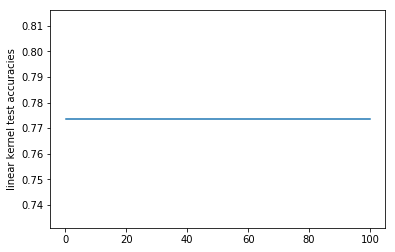

In [72]:
plt.plot(c_vals,linear_test_acc)
#plt.xlabel("C values")
plt.ylabel("linear kernel test accuracies")

In [ ]:
linear_test_acc = []
for c in c_vals:
    svm_linear(c,X_train_norm_split,Y_train_split,X_test_norm_split,Y_test_split)

Text(0,0.5,'linear kernel test accuracies')

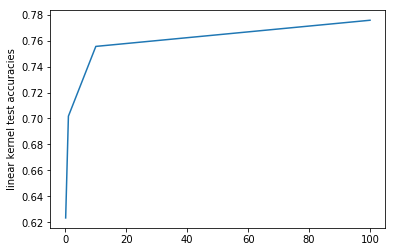

In [75]:
plt.plot(c_vals,linear_test_acc)
#plt.xlabel("C values")
plt.ylabel("linear kernel test accuracies")

In [93]:
def svm_rbf(c,X_train,Y_train,X_test,Y_test,gamma):
    '''
        Author: Kyle Ong
        Date: 05/13/2018
        
        will fit a svm.SVC(probability = False, kernel = 'rbf', gamma = gamma) to X_train and Y_train
        will calculate the train accuracy
        will calcuate the test accuracy
        
        c: type: int
        X_train: numpy.ndarray
        Y_train: numpy.ndarray
        X_test: numpy.ndarray
        Y_test: numpy.ndarray
        gamma: int
        
        will ignore convergence warnings thrown by sklearn    
    '''
    
    svm_rbf = svm.SVC(probability=False, kernel='rbf',gamma=gamma,C=c)
    
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore',category=ConvergenceWarning)
        
        try:
            svm_rbf.fit(X_train,Y_train)
            
            Y_hat_train = svm_rbf.predict(X_train)
            train_acc = np.mean(Y_hat_train == Y_train)
            print("This is the trainning accuracy with  Radial Basis Kernel and c_val {} and gamma {} : {}".format(c,gamma,train_acc))
            
            Y_hat_test = svm_rbf.predict(X_test)
            test_acc = np.mean(Y_hat_test == Y_test)
            print("This is the testing accuracy with  Radial Basis Kernel and c_val {} and gamma {} : {}".format(c,gamma,test_acc))
            
            print("\n")
            rbf_test_acc.append(test_acc)
            
        except Warning as w:
            print(w)


In [94]:
params = {
    0.1: [0.1,1,10,100],
    1 :  [0.1,1,10,100],
    10 :  [0.1,1,10,100],
    100 :  [0.1,1,10,100]
}

This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 0.1 : 0.6089887640449438
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 0.1 : 0.6233183856502242


This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 1 : 0.6089887640449438
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 1 : 0.6233183856502242


This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 10 : 0.6089887640449438
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 10 : 0.6233183856502242


This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 100 : 0.6089887640449438
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 100 : 0.6233183856502242


This is the trainning accuracy with  Radial Basis Kernel and c_val 1 and gamma 0.1 : 0.903370786516854
This is the testing accuracy with  Radial Basis Kernel 

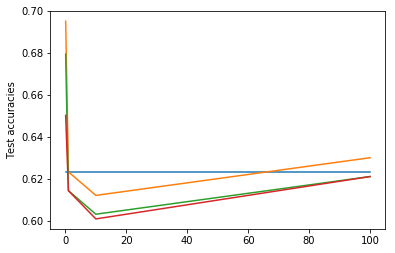

In [95]:
for k,v in params.items():
    
    rbf_test_acc = []
    c_val = k
    
    for gamma in v:
        svm_rbf(c_val,X_train_split,Y_train_split,X_test_split,Y_test_split,gamma)
        
    plt.plot(v,rbf_test_acc)
    #plt.xlabel("C Value")
    plt.ylabel("Test accuracies")

This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 0.1 : 0.6089887640449438
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 0.1 : 0.6233183856502242


This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 1 : 0.6089887640449438
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 1 : 0.6233183856502242


This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 10 : 0.6089887640449438
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 10 : 0.6233183856502242


This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 100 : 0.6089887640449438
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 100 : 0.6233183856502242


This is the trainning accuracy with  Radial Basis Kernel and c_val 1 and gamma 0.1 : 0.9797752808988764
This is the testing accuracy with  Radial Basis Kernel

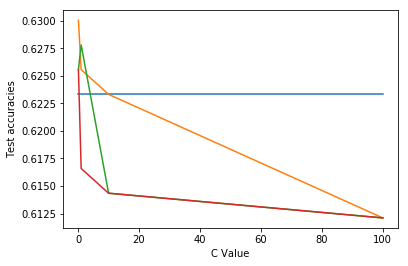

In [96]:
for k,v in params.items():
    
    rbf_test_acc = []
    c_val = k
    
    for gamma in v:
        svm_rbf(c_val,X_train_split_transformed,Y_train_split,X_test_split_transformed,Y_test_split,gamma)
        
    plt.plot(v,rbf_test_acc)
    plt.xlabel("C Value")
    plt.ylabel("Test accuracies")

This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 0.1 : 0.8157303370786517
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 0.1 : 0.8071748878923767


This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 1 : 0.6449438202247191
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 1 : 0.6210762331838565


This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 10 : 0.6292134831460674
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 10 : 0.6278026905829597


This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 100 : 0.6089887640449438
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 100 : 0.6233183856502242


This is the trainning accuracy with  Radial Basis Kernel and c_val 1 and gamma 0.1 : 0.8404494382022472
This is the testing accuracy with  Radial Basis Kernel

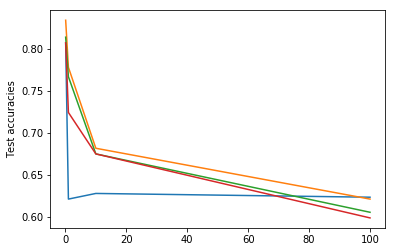

In [97]:
for k,v in params.items():
    
    rbf_test_acc = []
    c_val = k
    
    for gamma in v:
        svm_rbf(c_val,principal_components_split,Y_train_split,principal_components_split_test,Y_test_split,gamma)
        
    plt.plot(v,rbf_test_acc)
    #plt.xlabel("C Value")
    plt.ylabel("Test accuracies")


This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 0.1 : 0.6089887640449438
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 0.1 : 0.6233183856502242


This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 1 : 0.651685393258427
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 1 : 0.6905829596412556


This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 10 : 0.6719101123595506
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 10 : 0.7107623318385651


This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 100 : 0.6584269662921348
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 100 : 0.6547085201793722


This is the trainning accuracy with  Radial Basis Kernel and c_val 1 and gamma 0.1 : 0.647191011235955
This is the testing accuracy with  Radial Basis Kernel a

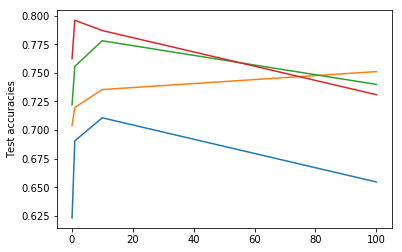

In [98]:
for k,v in params.items():
    
    rbf_test_acc = []
    c_val = k
    
    for gamma in v:
        svm_rbf(c_val,X_train_norm_split,Y_train_split,X_test_norm_split,Y_test_split,gamma)
        
    plt.plot(v,rbf_test_acc)
    #plt.xlabel("C Value")
    plt.ylabel("Test accuracies")

This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 0.1 : 0.8247191011235955
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 0.1 : 0.8183856502242153


This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 1 : 0.6404494382022472
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 1 : 0.6210762331838565


This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 10 : 0.6292134831460674
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 10 : 0.6278026905829597


This is the trainning accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 100 : 0.6089887640449438
This is the testing accuracy with  Radial Basis Kernel and c_val 0.1 and gamma 100 : 0.6233183856502242


This is the trainning accuracy with  Radial Basis Kernel and c_val 1 and gamma 0.1 : 0.8404494382022472
This is the testing accuracy with  Radial Basis Kernel

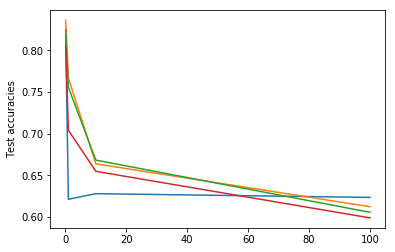

In [99]:
for k,v in params.items():
    
    rbf_test_acc = []
    c_val = k
    
    for gamma in v:
        svm_rbf(c_val,X_train_std_split,Y_train_split,X_test_std_split,Y_test_split,gamma)
        
    plt.plot(v,rbf_test_acc)
    #plt.xlabel("C Value")
    plt.ylabel("Test accuracies")

In [141]:
def svm_poly(X_train,Y_train,X_test,Y_test,c_val,degree):
    '''
        Author: Kyle Ong
        Date: 03/16/2018
        
        X_train : type: numpy.ndarray
        Y_train : type: numpy.ndarray
        X_test: type: numpy.ndarray
        Y_test: type: numpy.ndarray
        c_val : type: int
        degree : type: int
        
        will train a sklearn.svm.SVC(probability = False, kernel = "poly", degree=degree ) on X_train, Y_train
        will calculate accuracy for X_train and X_test
        will ignore convergence warnings thrown by sklearn
    '''
    
    svm_poly = svm.SVC(probability = False, kernel = "poly", C=c_val,degree=degree)
    svm_poly.fit(X_train,Y_train)
    
    with warnings.catch_warnings():
        
        warnings.filterwarnings('ignore',category=ConvergenceWarning)
        
        try:
            
            Y_hat_train = svm_poly.predict(X_train)
            train_acc = np.mean(Y_hat_train == Y_train)
            print("This is the trainning accuracy with polynomial kernel and {} degree and {} c_val: {}".format(degree,c_val,train_acc))
            
            Y_hat_test = svm_poly.predict(X_test)
            test_acc = np.mean(Y_hat_test == Y_test)
            print("This is the testing accuracy with polynomial kernel and {} degree and {} c_val: {}".format(degree,c_val,test_acc))
            
            
            print("\n")
        except Warning as w:
            print(w)


In [ ]:
params = {
        1:[0.1,1,10,100],
        2:[0.1,1,10,100],
}

In [ ]:
for k,v in params.items():
    d = k
    for c in v:
        svm_poly(X_train_split,Y_train_split,X_test_split,Y_test_split,c,d)

This is the trainning accuracy with polynomial kernel and 1 degree and 0.1 c_val: 0.7146067415730337
This is the testing accuracy with polynomial kernel and 1 degree and 0.1 c_val: 0.7645739910313901


This is the trainning accuracy with polynomial kernel and 1 degree and 1 c_val: 0.8
This is the testing accuracy with polynomial kernel and 1 degree and 1 c_val: 0.773542600896861


This is the trainning accuracy with polynomial kernel and 1 degree and 10 c_val: 0.8
This is the testing accuracy with polynomial kernel and 1 degree and 10 c_val: 0.773542600896861


This is the trainning accuracy with polynomial kernel and 1 degree and 100 c_val: 0.8
This is the testing accuracy with polynomial kernel and 1 degree and 100 c_val: 0.773542600896861


This is the trainning accuracy with polynomial kernel and 2 degree and 0.1 c_val: 0.8247191011235955
This is the testing accuracy with polynomial kernel and 2 degree and 0.1 c_val: 0.8116591928251121


This is the trainning accuracy with polynomi

In [81]:
for k,v in params.items():
    d = k
    for c in v:
        svm_poly(principal_components_split,Y_train_split,principal_components_split_test,Y_test_split,c,d)

This is the trainning accuracy with polynomial kernel and 1 degree and 0.1 c_val: 0.8
This is the testing accuracy with polynomial kernel and 1 degree and 0.1 c_val: 0.773542600896861


This is the trainning accuracy with polynomial kernel and 1 degree and 1 c_val: 0.8
This is the testing accuracy with polynomial kernel and 1 degree and 1 c_val: 0.773542600896861


This is the trainning accuracy with polynomial kernel and 1 degree and 10 c_val: 0.8
This is the testing accuracy with polynomial kernel and 1 degree and 10 c_val: 0.773542600896861


This is the trainning accuracy with polynomial kernel and 1 degree and 100 c_val: 0.8
This is the testing accuracy with polynomial kernel and 1 degree and 100 c_val: 0.773542600896861


This is the trainning accuracy with polynomial kernel and 2 degree and 0.1 c_val: 0.7056179775280899
This is the testing accuracy with polynomial kernel and 2 degree and 0.1 c_val: 0.7331838565022422


This is the trainning accuracy with polynomial kernel and 2 

In [140]:
for k,v in params.items():
    d = k
    for c in v:
        svm_poly(X_train_std_split,Y_train_split,X_test_std_split,Y_test_split,c,d)

NameError: name 'svm_poly' is not defined

Seems that the SVM with Radial Basis Kernel
c_val: 100
gamma: 0.1
performs the best on our generated test data after performing principal component analysis...

In [82]:
def get_svm_rbf(c,x_test,x_train,y_train,gamma):
    '''
        Author: Kyle Ong
        Date: 05/22/2018
        
        Will train a svm with rbf kernel on x_train and then return results of x_test
       
        c: type: int
        x_test: type: np.ndarray
        y_train: type: np.ndarray
        x_train: type: np.ndarray
        gamma: type: float
       
        
        wil ignore Convergence Warnings
    '''
    res = []
    df = []
        
    #train the model   
    svm_rbf = svm.SVC(probability=False, kernel='rbf',gamma=gamma)
    svm_rbf.fit(x_train,y_train)
    
    with warnings.catch_warnings():
        warnings.filterwarnings(action='ignore',category=ConvergenceWarning)
        
        try:
            
            #fit the model
            y_hat_test = svm_rbf.predict(x_test)
            df = pd.DataFrame(y_hat_test)
            
        except Warning as w:
            print(w)
            
    df.insert(0,'Survived',df[0])
    res = df.drop(0,axis=1)
    return res

Before we submit we must transform the test data similar to how we transformed the trainning data...
- [ ] data cleaning
- [ ] data engineering
- [ ] label encoding
- [ ] drop 'Names'

Here are some statistics regarding the Test dataset

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [68]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [69]:
test['Age'].fillna(test['Age'].median(),inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [70]:
#family size
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['IsAlone'] = 1
    
test['IsAlone'].loc[test['FamilySize'] > 1] = 0
    
#title
test["Title"] = test['Name'].str.split(",",expand=True)[1].str.split('.',expand=True)[0]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [71]:
frequency = 10
titles_count = (test['Title'].value_counts() >  frequency)
test["Title"] = test["Title"].apply(lambda x: x if titles_count[x] else 'Misc')

Let's check out the features now

In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
FamilySize     418 non-null int64
IsAlone        418 non-null int64
Title          418 non-null object
dtypes: float64(2), int64(6), object(6)
memory usage: 45.8+ KB


In [73]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FamilySize       0
IsAlone          0
Title            0
dtype: int64

In [81]:
drop_columns = ["PassengerId","Cabin","Ticket","Name"]
passenger_ids = test["PassengerId"]
test.drop(drop_columns,axis=1,inplace=True)

KeyError: 'PassengerId'

In [75]:
test['Embarked'] = label.fit_transform(test['Embarked'])
test['Title'] = label.fit_transform(test['Title'])
test['Sex'] = label.fit_transform(test['Sex'])

Let's check out the test data one last final time

In [76]:
test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Embarked      418 non-null int64
FamilySize    418 non-null int64
IsAlone       418 non-null int64
Title         418 non-null int64
dtypes: float64(2), int64(8)
memory usage: 32.7 KB


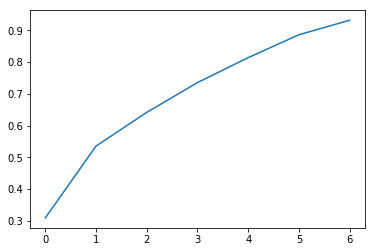

In [90]:
test_std = std_transform.fit_transform(test)
pca_test = PCA(n_components=7)
principal_components_test = pca_test.fit_transform(test_std)
#principal_components_test = pca_test.fit_transform(test)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
principal_components_test_transformed = poly.fit_transform(principal_components_test)

In [79]:
df = get_svm_rbf(1,principal_components_test,principal_components,Y_train,0.1)

NameError: name 'get_svm_rbf' is not defined

In [80]:
df.insert(0,'PassengerId',passenger_ids)

NameError: name 'df' is not defined

In [97]:
abs_path = os.getcwd() + '/submission.csv'
if not os.path.exists(abs_path):
    os.makedirs(abs_path)
    print("Created: {}".format(abs_path))

In [98]:
df.to_csv(abs_path,index=False)

In [130]:
def submit_svm_rbf(X_train,Y_train,X_test,c,g,file_name,passenger_ids):
    '''
        Author: Kyle Ong
        Date: 03/16/2018
        
        
        X_train : type: numpy.ndarray
        Y_train : type: numpy.ndarray
        X_test: type: numpy.ndarray
        c_val : type: int
        degree : type: int
        g:type: float
        file_name:type: string
        passenger_ids: type: [String]
        
        will train a sklearn.svm.SVC(probability = False, kernel = "rbf", gamma=g,C=c ) on X_train, Y_train)
        will calculate accuracy for X_train and X_test
        will ignore convergence warnings thrown by sklearn
        will save the pandas.dataframe to os.getcwd() + rel_path
        will create os.getcwd() + re_path if dne
    '''
    
    df = []
    res = []
    
    abs_path = os.getcwd() + '/submissions/'
    
    if not os.path.exists(abs_path):
        os.makedirs(abs_path)
        
    out_path = abs_path + file_name
 
        
    model = svm.SVC(probability=False,kernel = "rbf",gamma=g,C=c)
    model.fit(X_train,Y_train)
    
    
        
    with warnings.catch_warnings():
        
        warnings.filterwarnings(action='ignore',category=ConvergenceWarning)
        
        try:
            
            y_hat = model.predict(X_test)
            df = pd.DataFrame(y_hat)
            
        except Warning as w:
            print(w)
            
    df.insert(0,'Survived',df[0])
    res = df.drop(0,axis=1)
    res.insert(0,'PassengerId',passenger_ids)
    res.to_csv(out_path,index=False)

In [135]:
c = 1
g = 0.1
submit_svm_rbf(principal_components,Y_train,principal_components_test,c,g,'submission_svm_rbf.csv',passenger_ids)

In [136]:
def submit_svm_poly(X_train,Y_train,X_test,c,d,file_name,passenger_ids):
    '''
        Author: Kyle Ong
        Date: 05/3/2018
        
        will train a svm.SVC(probability=False,kernel='rbf',degree=d,C=c) on X_train and Y_train
        will save submission.csv to os.getcwd() + rel_path
        will create the directory if it does not exist
        
        X_train: type: np.ndarray
        Y_train: type: np.ndarray
        X_test: type: np.ndarray
        c: type: float
        d:type:int
        file_name: type:String
        passenger_ids: type: np.ndarray
        
        will ignore ConvergenceWarnings
    '''
    
    df = []
    res = []
    
    model = svm.SVC(probability=False,kernel='poly',degree=d,C=c)
    model.fit(X_train,Y_train)
    
    abs_path = os.getcwd() + '/submissions/'
    if not os.path.exists(abs_path):
        os.makedirs(abs_path)
        
    out_path = abs_path + file_name
        
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore',category=ConvergenceWarning)
        
        try:
            y_hat = model.predict(X_test)
            df = pd.DataFrame(y_hat)
        except Warning as w:
            print(w)
            
    df.insert(0,'Survived',df[0])
    res = df.drop(0,axis=1)
    res.insert(0,'PassengerId',passenger_ids)
    
    res.to_csv(out_path,index=False)

In [ ]:
c= 100
d =2
submit_svm_poly(principal_components,Y_train,principal_components_test,c,d,'submission_svm_poly.csv',passenger_ids)

In [138]:
def submit_logistic_model(c,l,X_train,Y_train,X_test,file_name,passenger_ids):
    '''
        Author:Kyle Ong
        Date: 05/23/2018
        
        will train linear_model.LogistRegression(C=c) on X_train and Y_train
        wlll predict on X_test 
        will write prediction to 'filename' to os.getcwd() + '/submission/'
        will create os.getcwd() + '/submission/' if dne
        
        c: type: int
        l: type: string
        X_train: type: np.ndarray
        Y_train:type: np.ndarray
        X_test: type:np.ndarray
        file_name: type: string
        passenger_ids: type: np.ndarray
        
        will ignore Convergence Warnings
    '''
    
    res = []
    
    out_path = '/submissions/' + file_name
    
    abs_path  = os.getcwd() + '/submissions/'
    if not os.path.exists(abs_path):
        os.makedirs(abs_path)
    
    
    out_path = abs_path + file_name
    
    model = 1
    
    if l.lower() == 'l1':
        model = linear_model.LogisticRegression(penalty=l,C=c,solver='saga')
    elif l.lower() == 'l2':
        model = linear_model.LogisticRegression(C=c)
    
    model.fit(X_train,Y_train)
    
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=ConvergenceWarning)
        
        try:
            y_hat = model.predict(X_test)
            res = pd.DataFrame(y_hat)
            
        except Warning as w:
            print(w)
            
    res.insert(0,'Survived',res[0])
    res.drop(0,axis=1,inplace=True)
    res.insert(0,'PassengerId',passenger_ids)
    res.to_csv(out_path,index=False)
    #subprocess.run(["kaggle","competitions",'submit',"-c","titanic","-f",out_path,"-m","logistic submission"])
            

In [139]:
c = 100
l = "L1"
submit_logistic_model(c,l,principal_components_split_transformed,Y_train_split,principal_components_test_transformed,'submission_logistic.csv',passenger_ids)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
